In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la
from mpl_toolkits import mplot3d

In [13]:
df = pd.read_csv('penguins_size.csv')
df.columns
df = df[['culmen_length_mm', 'culmen_depth_mm']]
filtered = df.dropna()

# turn into np array
arr = df.to_numpy()

,culmen_length_mm,culmen_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


Text(0.5, 1.0, 'Culmen Depth vs. Culmen Length')

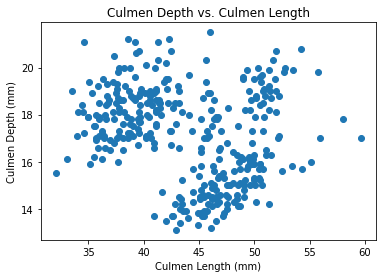

In [26]:
# Graph 2D: length and depth
plt.scatter(arr[:,0], arr[:,1])
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.title("Culmen Depth vs. Culmen Length")


Text(0.5, 1.0, 'Culmen Depth vs. Culmen Length')

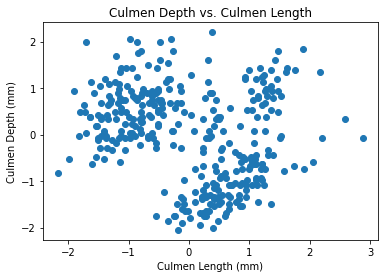

In [44]:
# Let's do PCA

# First we normalize the data
filtered = filtered - filtered.mean()
filtered = filtered / filtered.std()
normalized_arr = filtered.to_numpy()

plt.scatter(normalized_arr[:,0], normalized_arr[:,1])
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.title("Culmen Depth vs. Culmen Length")

# Normalized Data

In [95]:

cov = normalized_arr.T@normalized_arr

eigvals, eigvecs = la.eig(cov)
sorted = eigvals.argsort()[::-1]

eigvals = eigvals[sorted]
eigvecs = eigvecs[:, sorted]

# Show new axes

print(eigvecs, eigvals)

print(eigvals/np.sum(eigvals))


[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]] [421.15302879 260.84697121]
[0.61752644 0.38247356]


Text(0.5, 1.0, 'Culmen Depth vs. Culmen Length')

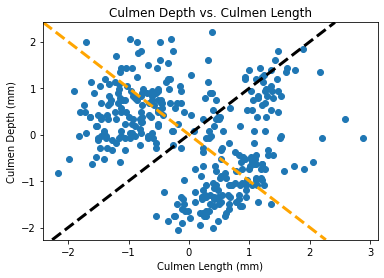

In [75]:
plt.axline([0,0],eigvecs[:,0], color = 'orange', linestyle = 'dashed', linewidth = '3')
plt.axline([0,0],eigvecs[:,1], color = 'black', linestyle = 'dashed', linewidth = '3')
plt.scatter(normalized_arr[:,0], normalized_arr[:,1])
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.title("Culmen Depth vs. Culmen Length")



In [85]:
for point in normalized_arr:
    projected_arr = np.copy(normalized_arr)
    for i, point in enumerate (normalized_arr):
        projected_arr[i] = eigvecs@point
    

    

Text(0.5, 1.0, 'Points Projected Onto Principle Components')

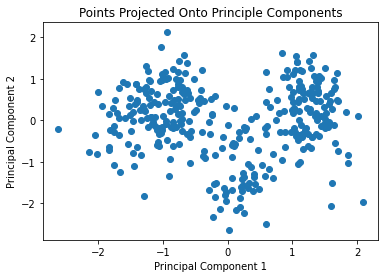

In [94]:
plt.scatter(projected_arr[:,0], projected_arr[:,1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Points Projected Onto Principle Components")

In [154]:
# Now we're gonna do try and use this data so that we can infer species down the line

df = pd.read_csv('penguins_size.csv')
df = df[['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex' ]] # Dropping island b/c I won't use it
df = df.dropna()

# First split by male and female
dfM = df.loc[df['sex'] == 'MALE']
dfF = df.loc[df['sex'] == 'FEMALE']

dfMData = dfM[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
dfFData = dfF[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


In [135]:
# Normalize the data & find the covariance matricies for male and female datasets

# MALE
dfMData = dfMData - dfMData.mean()
dfMData = dfMData / dfMData.std()
normalized_arr_Male = dfMData.to_numpy()

covM = normalized_arr_Male.T@normalized_arr_Male
eigvalsM, eigvecsM = la.eig(covM)
sortedM = eigvalsM.argsort()[::-1]
eigvalsM = eigvalsM[sortedM]
eigvecsM = eigvecsM[:, sortedM]

print("Male", eigvecsM)

# FEMALE
dfFData = dfFData - dfFData.mean()
dfFData = dfFData / dfFData.std()
normalized_arr_Female = dfFData.to_numpy()

covF = normalized_arr_Female.T@normalized_arr_Female
eigvalsF, eigvecsF = la.eig(covF)
sortedF = eigvalsF.argsort()[::-1]
eigvalsF = eigvalsF[sortedF]
eigvecsF = eigvecsF[:, sortedF]


Male [[ 0.41413892 -0.84005818 -0.25948996  0.23549134]
 [-0.48955565 -0.46175546  0.73913592  0.02820036]
 [ 0.55270509 -0.04959423  0.36363999 -0.74821351]
 [ 0.53229814  0.28040071  0.50409227  0.61961691]]


In [147]:
# Drop the last principal component & project

for point in normalized_arr_Male:
    projected_arr_Male = np.zeros([normalized_arr_Male.shape[0], normalized_arr_Male.shape[1] - 1])
    for i, point in enumerate (normalized_arr_Male):
        projected_arr_Male[i] = eigvecsM[:-1, :]@point #excluding last row of the eig vecs eliminates the 4th principal component

for point in normalized_arr_Female:
    projected_arr_Female = np.zeros([normalized_arr_Female.shape[0], normalized_arr_Female.shape[1] - 1])
    for i, point in enumerate (normalized_arr_Female):
        projected_arr_Female[i] = eigvecsF[:-1, :]@point #excluding last row of the eig vecs eliminates the 4th principal component

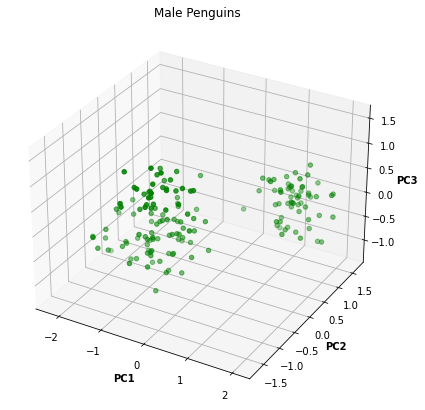

In [153]:
# Let's visualize

# MALE

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(projected_arr_Male[:,0], projected_arr_Male[:,1], projected_arr_Male[:,2], color = "green")
plt.title("Male Penguins")
ax.set_xlabel('PC1', fontweight ='bold') 
ax.set_ylabel('PC2', fontweight ='bold') 
ax.set_zlabel('PC3', fontweight ='bold')
 
# show plot
plt.show()

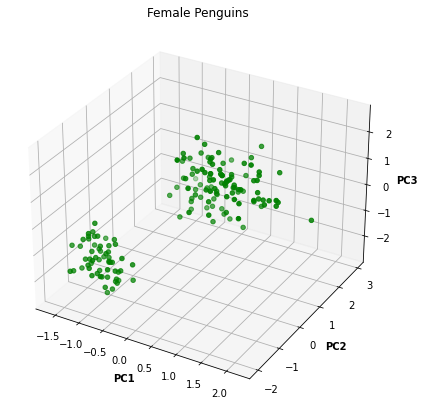

In [156]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(projected_arr_Female[:,0], projected_arr_Female[:,1], projected_arr_Female[:,2], color = "green")
plt.title("Female Penguins")
ax.set_xlabel('PC1', fontweight ='bold') 
ax.set_ylabel('PC2', fontweight ='bold') 
ax.set_zlabel('PC3', fontweight ='bold')
 
# show plot
plt.show()